# <font color=orange>**Evrisimsel Sinir Aglari**</font> <font color=gray>**(CNN)**</font>

## <font color=orange>**Gercek Zamanli Rakam Siniflandirma**</font> <font color=gray>**(With CNN)**</font>

## <font color=gray>**Model Training**</font> 

In [23]:
# Kutuphanelerin Yuklenmesi
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import pickle

In [2]:
path = 'myData'

mylist = os.listdir(path)
noOfclasses = len(mylist)

print('Label(sinif) Sayisi: ',noOfclasses)

Label(sinif) Sayisi:  10


In [3]:
images = []
classNo = []

for i in range(noOfclasses):
    myImageList = os.listdir(path + '\\' + str(i))
    for j in myImageList:
        img = cv2.imread(path + '\\' + str(i) + '\\' + j)
        img = cv2.resize(img, (32,32))
        images.append(img)
        classNo.append(i)
        
print(len(images))
print(len(classNo))

10160
10160


In [4]:
images = np.array(images)
classNo = np.array(classNo)

print(images.shape)
print(classNo.shape)

(10160, 32, 32, 3)
(10160,)


In [5]:
# Veriyi Ayirma

x_train, x_test, y_train, y_test = train_test_split(images, classNo,
                                                   test_size=.5,
                                                   random_state=42)

x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train,
                                                   test_size=.2,
                                                   random_state=42)

In [6]:
print(images.shape)
print('-'*20)
print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)

(10160, 32, 32, 3)
--------------------
(4064, 32, 32, 3)
(5080, 32, 32, 3)
(1016, 32, 32, 3)


C:\Users\ithinka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ithinka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ithinka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


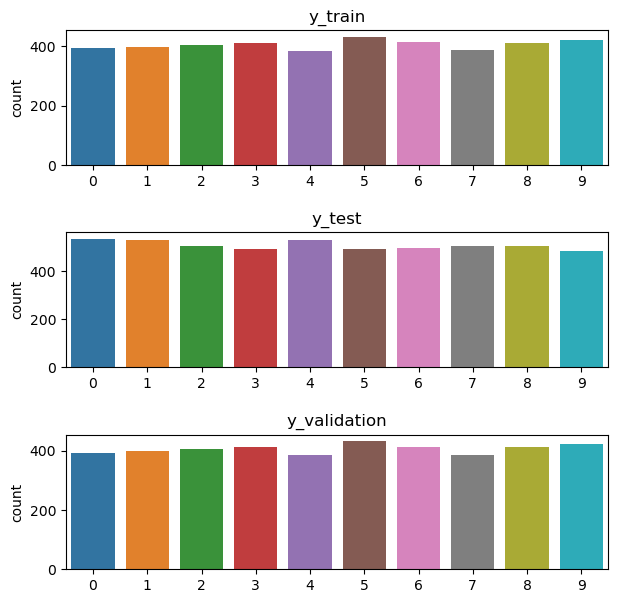

In [7]:
# Gorsellestirme:

fig, axes = plt.subplots(3,1, figsize=(7,7))
fig.subplots_adjust(hspace=.5)
sns.countplot(y_train, ax = axes[0])
axes[0].set_title('y_train')

sns.countplot(y_test, ax = axes[1])
axes[1].set_title('y_test')

sns.countplot(y_train, ax = axes[2])
axes[2].set_title('y_validation')

import warnings
warnings.filterwarnings('ignore');

In [8]:
# Preprocess

def preProcess(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Siyah-beyaz'a cevirme
    img = cv2.equalizeHist(img) # histogramini 0-255 arasinda genisletme
    img = img / 255
    return img

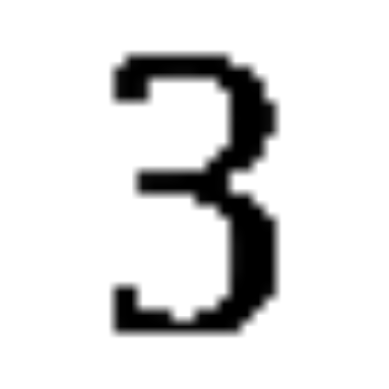

In [9]:
# Kontrol edelim: x_train'in 50. index'ine bakalim

idx = 1550
img = preProcess(x_train[idx])
img = cv2.resize(img, (300,300)) #Yukarida 32x32 yapmistik burada buyuk ve guzel gorunmesi icin (300,300)
plt.imshow(img,cmap='gray'),plt.axis('off');

In [10]:
#Preprecess isleminin tum verilere uygulanmasi

x_train = np.array(list(map(preProcess, x_train)))
x_test = np.array(list(map(preProcess, x_test)))
x_validation = np.array(list(map(preProcess, x_validation)))

In [11]:
# Reshape 

x_train = x_train.reshape(-1,32,32,1)
x_test = x_test.reshape(-1,32,32,1)
x_validation = x_validation.reshape(-1,32,32,1)
# -1 demek x_train boyutu ne ise kendine gore ayarla demek
# 32x32'yi ayarla digerleri ne olursa olsun demek

#Orn:
print(x_train.shape)

(4064, 32, 32, 1)


In [12]:
# Data Generate

dataGen = ImageDataGenerator(width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             zoom_range = 0.1,
                             rotation_range = 10)

In [13]:
dataGen.fit(x_train)

In [14]:
y_train = to_categorical(y_train, noOfclasses)
y_test = to_categorical(y_test, noOfclasses)
y_validation = to_categorical(y_validation, noOfclasses)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [17]:
# Model olusturma:

model = Sequential()
model.add(Conv2D(input_shape = (32,32,1), filters = 8, kernel_size = (5,5), activation = 'relu', padding = 'same'))
# Piksel ekleme
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'same'))
# Piksel ekleme
model.add(MaxPooling2D(pool_size = (2,2)))
# Yeni veri ekledigimiz icin Overfitting'i engellemek gerekiyor. Bu yuzden Dropout eklenir.
model.add(Dropout(.2))
model.add(Flatten()) # Duzlestirme
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(units=noOfclasses, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [18]:
batch_size = 250
hist = model.fit_generator(dataGen.flow(x_train,y_train,batch_size=batch_size),
                                        validation_data = (x_validation, y_validation),
                                        epochs = 15, steps_per_epoch = x_train.shape[0]//batch_size,
                                        shuffle = 1)

Epoch 1/15
16/16 [==============================] - 2s 100ms/step - loss: 2.2666 - accuracy: 0.1704 - val_loss: 2.0683 - val_accuracy: 0.3012
Epoch 2/15
16/16 [==============================] - 1s 89ms/step - loss: 1.9221 - accuracy: 0.4326 - val_loss: 1.1279 - val_accuracy: 0.7372
Epoch 3/15
16/16 [==============================] - 2s 93ms/step - loss: 1.3310 - accuracy: 0.5739 - val_loss: 0.5656 - val_accuracy: 0.8799
Epoch 4/15
16/16 [==============================] - 2s 107ms/step - loss: 0.9377 - accuracy: 0.7014 - val_loss: 0.3662 - val_accuracy: 0.9094
Epoch 5/15
16/16 [==============================] - 1s 96ms/step - loss: 0.7229 - accuracy: 0.7798 - val_loss: 0.2585 - val_accuracy: 0.9222
Epoch 6/15
16/16 [==============================] - 2s 96ms/step - loss: 0.5622 - accuracy: 0.8317 - val_loss: 0.2122 - val_accuracy: 0.9321
Epoch 7/15
16/16 [==============================] - 1s 92ms/step - loss: 0.4929 - accuracy: 0.8482 - val_loss: 0.1555 - val_accuracy: 0.9537
Epoch 8/15


In [19]:
pickle_out = open('model_trained_new.p','wb')
pickle.dump(model, pickle_out)
pickle_out.close()

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-15 23:17:53         3367
metadata.json                               

In [20]:
# Yukaridaki islemde modeli kaydettik.

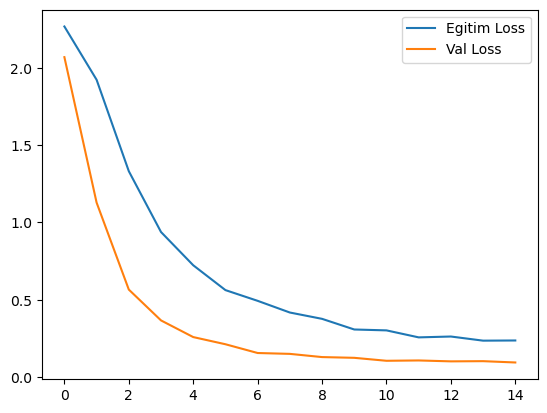

In [21]:
# Degerlendirme:
hist.history.keys()

plt.figure()
plt.plot(hist.history['loss'], label = 'Egitim Loss')
plt.plot(hist.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.show()

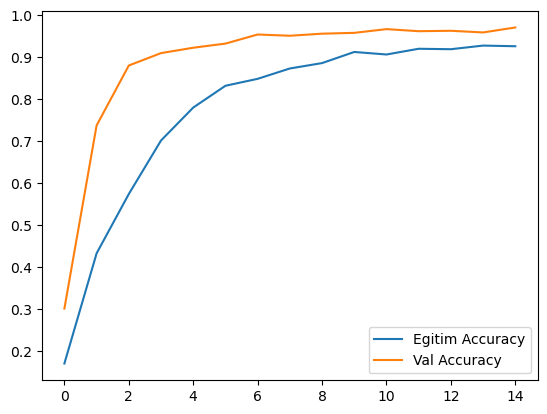

In [22]:
plt.figure()
plt.plot(hist.history['accuracy'], label = 'Egitim Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Val Accuracy')
plt.legend()
plt.show()

In [24]:
score = model.evaluate(x_test,y_test,verbose=1)
print('Test Loss:',score[0])
print('Test Accuracy:',score[1])

159/159 [==============================] - 1s 5ms/step - loss: 0.0933 - accuracy: 0.9709
Test Loss: 0.09329381585121155
Test Accuracy: 0.9708661437034607


32/32 [==============================] - 0s 5ms/step


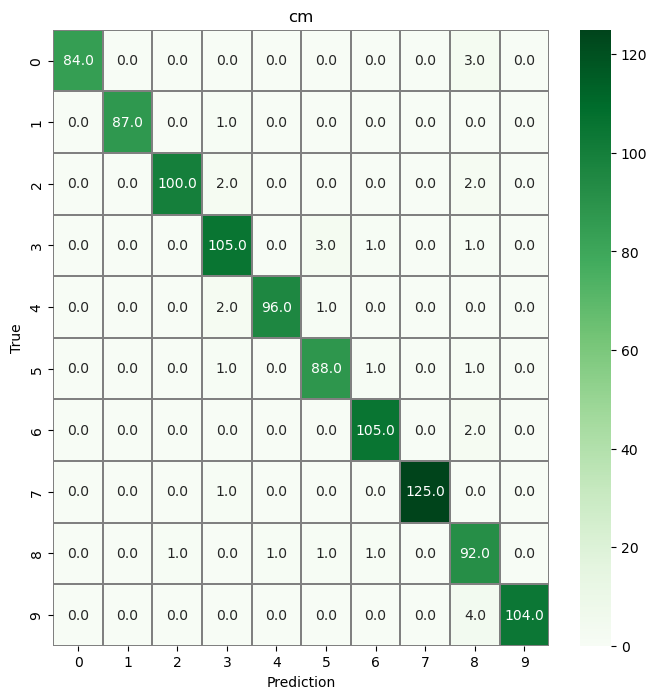

In [27]:
y_pred = model.predict(x_validation)

y_pred_class = np.argmax(y_pred, axis = 1)

Y_true = np.argmax(y_validation, axis = 1)

cm = confusion_matrix(Y_true, y_pred_class)

f, ax =  plt.subplots(figsize = (8,8))
sns.heatmap(cm, annot = True, linewidths=0.01, cmap='Greens', linecolor='gray', fmt = '.1f', ax=ax)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('cm')
plt.show();